# Roman Emperors and Popularity

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
df_emperors = pd.read_csv('roman-emperors.zip', 
                          index_col=0, 
                          usecols=['Index', 
                                   'Name',  
                                   'Reign Start',
                                   'Reign End', 
                                   'Dynasty', 
                                  ]).sort_index()
df_pantheon = pd.read_csv('pantheon.tsv.bz2', compression='bz2', 
                          header=0, sep='\t', engine='python')

In [3]:
df_pantheon = df_pantheon[['name', 'numlangs', 'HPI']].rename(columns={'name': 'Name'})

print(df_pantheon.shape)
df_pantheon.head()

(11341, 3)


,Name,numlangs,HPI
0,Abraham Lincoln,131,27.938585
1,Aristotle,152,31.993795
2,Ayn Rand,55,24.325936
3,Andre Agassi,69,20.925999
4,Aldous Huxley,62,25.996605


In [4]:
print(df_emperors.shape)
df_emperors.head()

(68, 4)


,Name,Reign Start,Reign End,Dynasty
Index,,,,
1,Augustus,0026-01-16T00:53:28+00:53,0014-08-19T00:53:28+00:53,Julio-Claudian
2,Tiberius,0014-09-18T00:53:28+00:53,0037-03-16T00:53:28+00:53,Julio-Claudian
3,Caligula,0037-03-18T00:53:28+00:53,0041-01-24T00:53:28+00:53,Julio-Claudian
4,Claudius,0041-01-25T00:53:28+00:53,0054-10-13T00:53:28+00:53,Julio-Claudian
5,Nero,0054-10-13T00:53:28+00:53,0068-06-09T00:53:28+00:53,Julio-Claudian


In [5]:
df_emperors['Reign Start'] = df_emperors['Reign Start'].str.split('T').str[0]
df_emperors['Reign Start'] = df_emperors['Reign Start'].apply(lambda x: x.replace('-', '/'))
df_emperors['Reign End'] = df_emperors['Reign End'].str.split('T').str[0]
df_emperors['Reign End'] = df_emperors['Reign End'].apply(lambda x: x.replace('-', '/'))

reign_days_start = []
for start_time in df_emperors['Reign Start']:
    start_time = dt.datetime.strptime(start_time, '%Y/%m/%d')
    reign_days_start.append(((start_time.year - 1)* 365) + (start_time.month * 30) + (start_time.day))
    
reign_days_end = []
for end_time in df_emperors['Reign End']:
    end_time = dt.datetime.strptime(end_time, '%Y/%m/%d')
    reign_days_end.append(((end_time.year - 1) * 365) + (end_time.month * 30) + (end_time.day))

df_emperors['Reign Start_days'] = reign_days_start
df_emperors['Reign End_days'] = reign_days_end  
    
df_emperors['Total_reign_days'] = df_emperors['Reign End_days'] - df_emperors['Reign Start_days']

#fix Augustus' (index 1) Total_reign_days because start is in BCE
df_emperors.loc[df_emperors.Name == 'Augustus','Total_reign_days'] = (
    df_emperors.loc[df_emperors.Name == 'Augustus','Reign End_days'] 
    + df_emperors.loc[df_emperors.Name == 'Augustus','Reign Start_days'])

df_emperors.head()

,Name,Reign Start,Reign End,Dynasty,Reign Start_days,Reign End_days,Total_reign_days
Index,,,,,,,
1,Augustus,0026/01/16,0014/08/19,Julio-Claudian,9171,5004,14175
2,Tiberius,0014/09/18,0037/03/16,Julio-Claudian,5033,13246,8213
3,Caligula,0037/03/18,0041/01/24,Julio-Claudian,13248,14654,1406
4,Claudius,0041/01/25,0054/10/13,Julio-Claudian,14655,19658,5003
5,Nero,0054/10/13,0068/06/09,Julio-Claudian,19658,24644,4986


In [6]:
join = pd.merge(df_emperors, df_pantheon, how='inner', on='Name', right_index=True)
df = pd.merge(df_emperors, join, how='outer', on='Name', right_index=True)
df = df.drop(df.columns[df.columns.str.contains('_y')], axis=1)
df.columns= df.columns.str.replace('_x','')

print(df.shape)
df.head()

(68, 9)


,Name,Reign Start,Reign End,Dynasty,Reign Start_days,Reign End_days,Total_reign_days,numlangs,HPI
Index,,,,,,,,,
1,Augustus,0026/01/16,0014/08/19,Julio-Claudian,9171,5004,14175,117.0,30.419519
2,Tiberius,0014/09/18,0037/03/16,Julio-Claudian,5033,13246,8213,75.0,28.532566
3,Caligula,0037/03/18,0041/01/24,Julio-Claudian,13248,14654,1406,76.0,29.453559
4,Claudius,0041/01/25,0054/10/13,Julio-Claudian,14655,19658,5003,71.0,27.966199
5,Nero,0054/10/13,0068/06/09,Julio-Claudian,19658,24644,4986,79.0,29.859917


In [7]:
df['HPI_log'] = np.log10(df['HPI'])
df['Total_reign_days_log'] = np.log10(df['Total_reign_days'])

df.head()

,Name,Reign Start,Reign End,Dynasty,Reign Start_days,Reign End_days,Total_reign_days,numlangs,HPI,HPI_log,Total_reign_days_log
Index,,,,,,,,,,,
1,Augustus,0026/01/16,0014/08/19,Julio-Claudian,9171,5004,14175,117.0,30.419519,1.483152,4.151523
2,Tiberius,0014/09/18,0037/03/16,Julio-Claudian,5033,13246,8213,75.0,28.532566,1.455341,3.914502
3,Caligula,0037/03/18,0041/01/24,Julio-Claudian,13248,14654,1406,76.0,29.453559,1.469138,3.147985
4,Claudius,0041/01/25,0054/10/13,Julio-Claudian,14655,19658,5003,71.0,27.966199,1.446633,3.699231
5,Nero,0054/10/13,0068/06/09,Julio-Claudian,19658,24644,4986,79.0,29.859917,1.475089,3.697752


In [8]:
year_reign_end = []
for year in df['Reign End']:
    year_reign_end.append(float(year.split('/')[0]))
    
df['Year'] = year_reign_end

In [9]:
year_list = []
for year in df['Reign End']:
    year_list.append(float(year.split('/')[0]))

year_list = np.array(year_list)

In [10]:
Julio_Claudian = df[df['Dynasty'] == 'Julio-Claudian']
Flavian = df[df['Dynasty'] == 'Flavian']
Nerva_Antonine = df[df['Dynasty'] == 'Nerva-Antonine']
Severan = df[df['Dynasty'] == 'Severan']
Gordian = df[df['Dynasty'] == 'Gordian']
Constantinian = df[df['Dynasty'] == 'Constantinian']

<IPython.core.display.Javascript object>


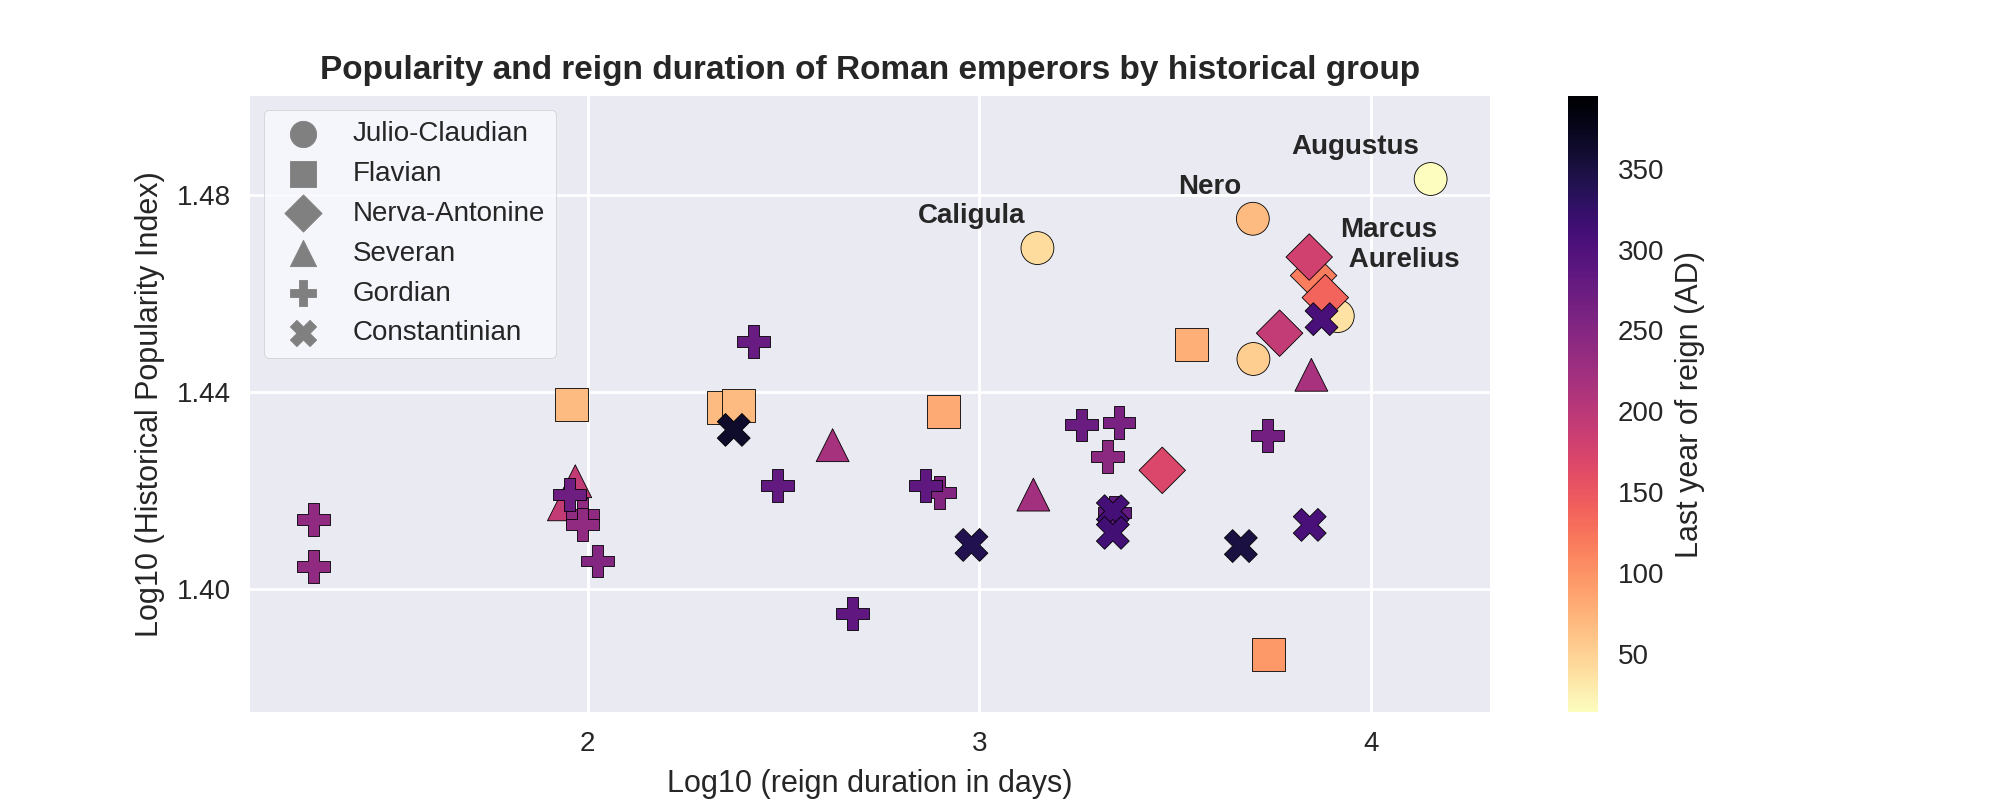

In [11]:
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(10,4))

im1 = ax.scatter(Julio_Claudian.Total_reign_days_log, Julio_Claudian.HPI_log, 
                c=Julio_Claudian.Year, cmap='magma_r', s=140, edgecolor='black', 
                marker='o', vmin=year_list.min(), vmax=year_list.max(), label='Julio-Claudian')

im2 = ax.scatter(Flavian.Total_reign_days_log, Flavian.HPI_log, 
                c=Flavian.Year, cmap='magma_r', s=140, edgecolor='black', 
                marker='s', vmin=year_list.min(), vmax=year_list.max(), label='Flavian')

im3 = ax.scatter(Nerva_Antonine.Total_reign_days_log, Nerva_Antonine.HPI_log, 
                c=Nerva_Antonine.Year, cmap='magma_r', s=140, edgecolor='black', 
                marker='D', vmin=year_list.min(), vmax=year_list.max(), label='Nerva-Antonine')

im4 = ax.scatter(Severan.Total_reign_days_log, Severan.HPI_log, 
                c=Severan.Year, cmap='magma_r', s=140, edgecolor='black', 
                marker='^', vmin=year_list.min(), vmax=year_list.max(), label='Severan')

im5 = ax.scatter(Gordian.Total_reign_days_log, Gordian.HPI_log, 
                c=Gordian.Year, cmap='magma_r', s=140, edgecolor='black', 
                marker='P', vmin=year_list.min(), vmax=year_list.max(), label='Gordian')

im6 = ax.scatter(Constantinian.Total_reign_days_log, Constantinian.HPI_log, 
                c=Constantinian.Year, cmap='magma_r', s=140, edgecolor='black', 
                marker='X', vmin=year_list.min(), vmax=year_list.max(), label='Constantinian')

#setting the y-axis eliminates the outlier emperor 'Nerva' 
plt.ylim(1.375, 1.50)

ax.set_title('Popularity and reign duration of Roman emperors by historical group', fontweight ='bold') 
ax.set_ylabel('Log10 (Historical Popularity Index)')
ax.set_xlabel('Log10 (reign duration in days)')
ax.set_xticks([2, 3, 4])
ax.set_yticks([1.40, 1.44, 1.48])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend = ax.legend(fancybox=True, fontsize='medium', 
                   frameon=True, markerscale=0.8)
legend.get_frame().set_facecolor('ghostwhite')
legend.legendHandles[0].set_color('gray')
legend.legendHandles[1].set_color('gray')
legend.legendHandles[2].set_color('gray')
legend.legendHandles[3].set_color('gray')
legend.legendHandles[4].set_color('gray')
legend.legendHandles[5].set_color('gray')

Augustus = plt.text((df.loc[df.Name == 'Augustus','Total_reign_days_log'] - 0.03),
         (df.loc[df.Name == 'Augustus','HPI_log'] + 0.005),
         'Augustus', horizontalalignment='right', fontweight='bold')

Caligula = plt.text((df.loc[df.Name == 'Caligula','Total_reign_days_log'] - 0.03),
         (df.loc[df.Name == 'Caligula','HPI_log'] + 0.005),
         'Caligula', horizontalalignment='right', fontweight='bold')

Nero = plt.text((df.loc[df.Name == 'Nero','Total_reign_days_log'] - 0.03),
         (df.loc[df.Name == 'Nero','HPI_log'] + 0.005),
         'Nero', horizontalalignment='right', fontweight='bold')

Marcus = plt.text((df.loc[df.Name == 'Marcus Aurelius','Total_reign_days_log'] + 0.08),
         (df.loc[df.Name == 'Marcus Aurelius','HPI_log'] - 0.002),
         'Marcus\n Aurelius', fontweight='bold')

plt.colorbar(im1, label='Last year of reign (AD)')

plt.savefig('emperors-popularity.pdf', bbox_inches='tight', pad_inches=0.2)
plt.show()

In [12]:
#emperors wih missing (HPI) data 
def nans(df): 
    return df[df.isnull().any(axis=1)]

print(nans(df).shape)
nans(df) #+ Nerva, who is not included in the figure

(18, 12)


,Name,Reign Start,Reign End,Dynasty,Reign Start_days,Reign End_days,Total_reign_days,numlangs,HPI,HPI_log,Total_reign_days_log,Year
Index,,,,,,,,,,,,
15,Antonius Pius,0138/07/10,0161/03/07,Nerva-Antonine,50225,58497,8272,NaN,NaN,NaN,3.917611,161.0
21,Septimus Severus,0193/04/09,0211/02/04,Severan,70209,76714,6505,NaN,NaN,NaN,3.813247,211.0
23,Geta,0209/01/01,0211/12/26,Severan,75951,77036,1085,NaN,NaN,NaN,3.035430,211.0
26,Severus Alexander,0222/03/13,0235/03/18,Severan,80768,85518,4750,NaN,NaN,NaN,3.676694,235.0
27,Maximinus I,0235/03/20,0238/06/15,Gordian,85520,86700,1180,NaN,NaN,NaN,3.071882,238.0
33,Philip I,0244/02/14,0249/10/01,Gordian,88769,90821,2052,NaN,NaN,NaN,3.312177,249.0
34,Trajan Decius,0249/10/01,0251/06/15,Gordian,90821,91445,624,NaN,NaN,NaN,2.795185,251.0
37,Aemilian,0253/08/15,0253/10/15,Gordian,92235,92295,60,NaN,NaN,NaN,1.778151,253.0
40,Claudius Gothicus,0268/09/15,0270/01/15,Gordian,97740,98230,490,NaN,NaN,NaN,2.690196,270.0
